import libraries

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
print('Libraries Imported')


Libraries Imported


In [346]:
data_test = pd.read_excel(r'C:\Users\Manuel Revelo\Desktop\PI2_DATATHON_DATA03\PROYECTO DATATHON\datathon\Datathon-cohorte3\E-Commerce_test.xlsx')

In [347]:
data_train = pd.read_excel(r'C:\Users\Manuel Revelo\Desktop\PI2_DATATHON_DATA03\PROYECTO DATATHON\datathon\Datathon-cohorte3\E-Commerce_train.xlsx')

In [348]:
data_test.shape

(2000, 11)

In [349]:
data_train.shape

(8999, 12)

In [350]:
data_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [351]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


In [352]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


busqueda de nulos y duplicados

In [353]:
data_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [354]:
data_test.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [355]:
print('La cantidad de registros duplicados en train es:', data_train.duplicated().sum())
print('La cantidad de registros duplicados en test es:', data_test.duplicated().sum())

La cantidad de registros duplicados en train es: 0
La cantidad de registros duplicados en test es: 0


In [356]:
data_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [357]:
data_train4 = data_train

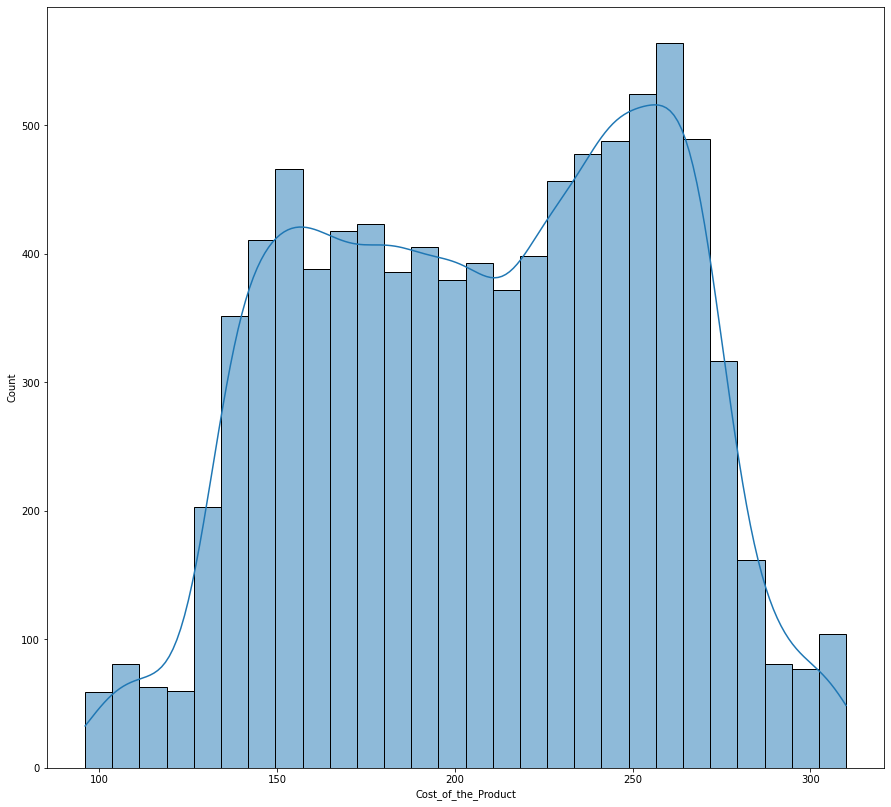

In [358]:
sns.histplot(x = 'Cost_of_the_Product', data= data_train4, kde = True)
plt.show()

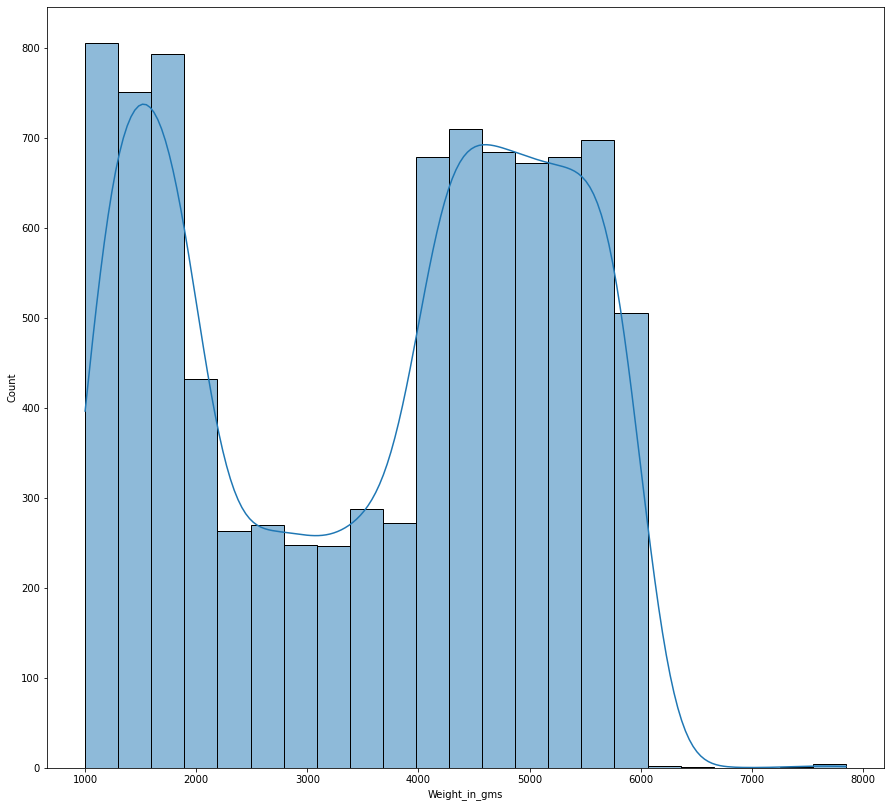

In [360]:
sns.histplot(x = 'Weight_in_gms', data= data_train4, kde = True)
plt.show()

Miramos algunas distribuciones de algunos features vemos que no son normales asi q aplicamos min max scaler en pasos posteriores

Analisis de la variable resultado Reached.on.Time_Y.N'

Total de entregas a tiempo

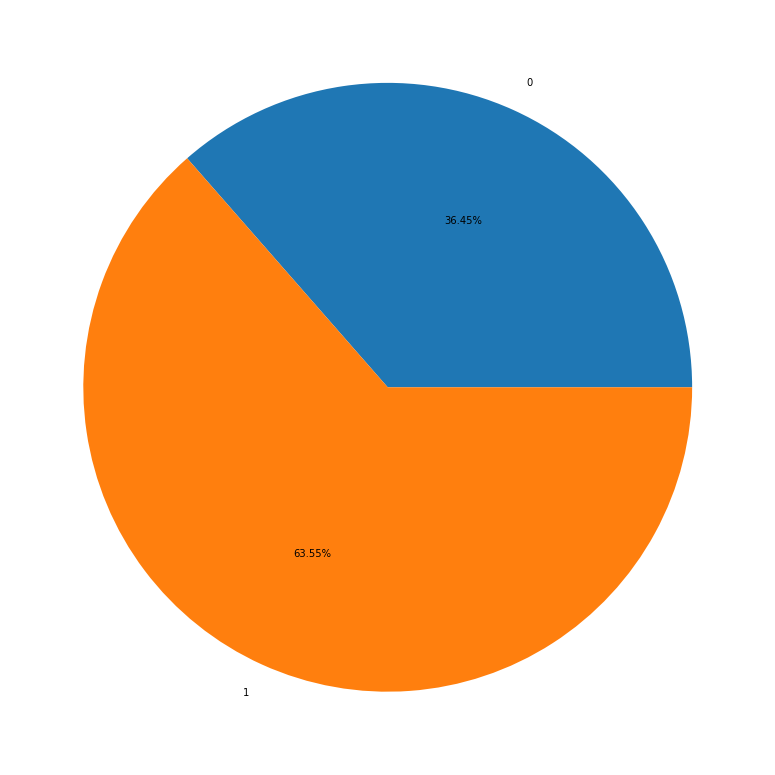

In [361]:
retraso=pd.DataFrame(data_train4.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(data_train4)).reset_index()
plt.pie(retraso['ID'],labels=retraso['Reached.on.Time_Y.N'],autopct='%1.2f%%');

36,5% de los envios no llega a tiempo

Text(0, 0.5, 'porcentaje')

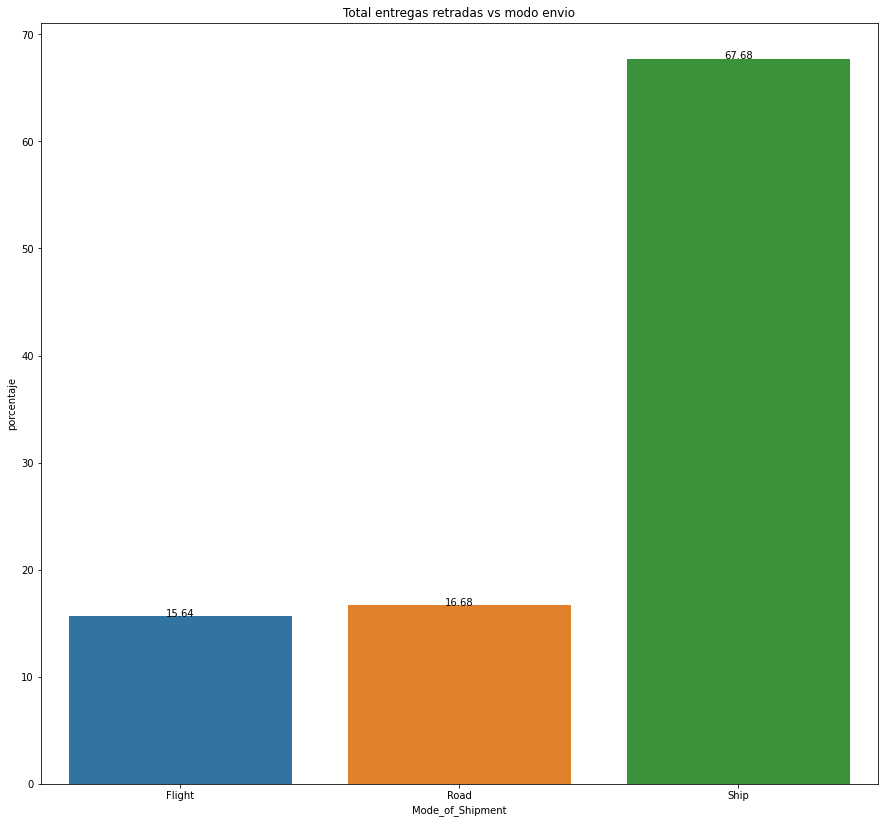

In [362]:
data1 = data_train4[data_train4['Reached.on.Time_Y.N']==0]
data2=pd.DataFrame((data1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data1)*100)
data2=data2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data2 )
for index, row in data2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total entregas retradas vs modo envio')
plt.ylabel('porcentaje')

Las entrega por barco son las que representan el mayor porcentaje de retrasos con 67.7%

Text(0, 0.5, 'porcentaje')

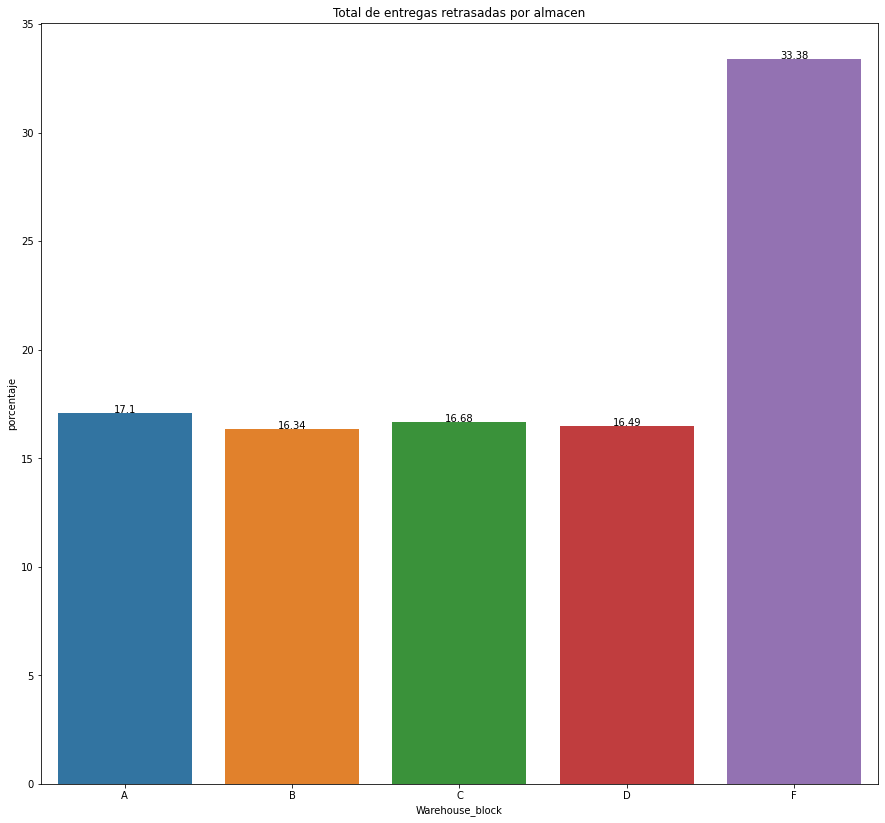

In [363]:
data3=pd.DataFrame((data1.groupby(['Warehouse_block'])['ID'].count())/len(data1)*100)
data3=data3.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=data3 )
for index, row in data3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total de entregas retrasadas por almacen')
plt.ylabel('porcentaje')

las entregas retrasadas desde el alamcen F son mayores

Text(0.5, 1.0, 'Almacen vs entrega a tiempo o no')

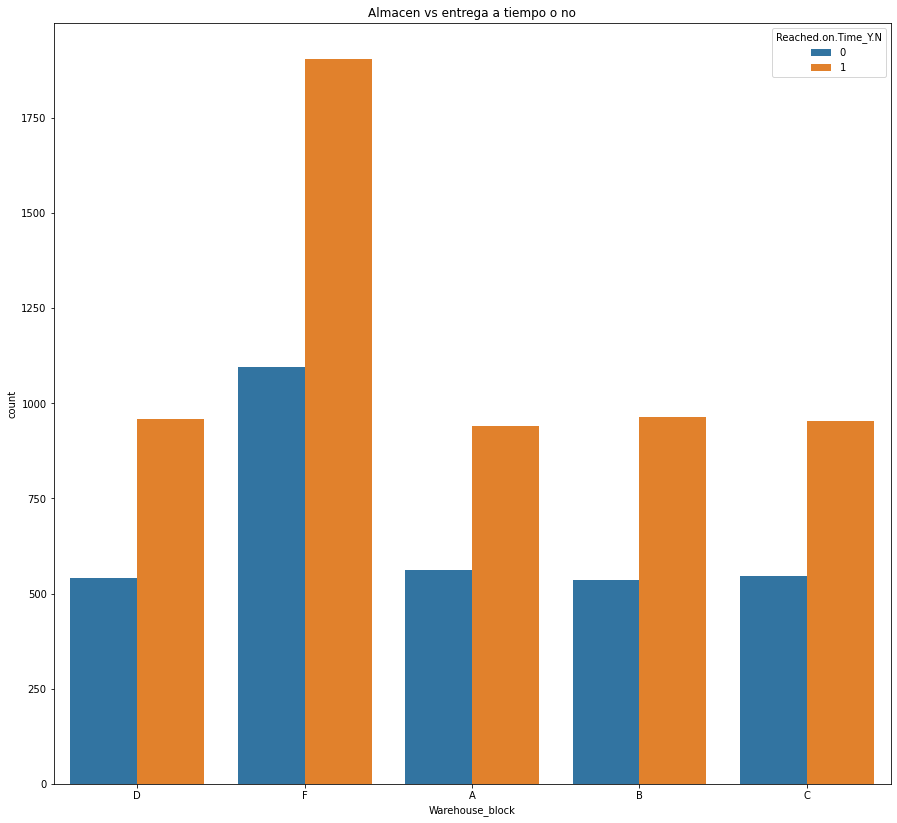

In [364]:
sns.countplot(x = "Warehouse_block", data = data_train4, hue="Reached.on.Time_Y.N")
plt.title("Almacen vs entrega a tiempo o no")

el almacen 4(F) es el q mas entregas retrasadas presenta

Text(0.5, 1.0, 'Importancia de producto por llegada a tiempo o No')

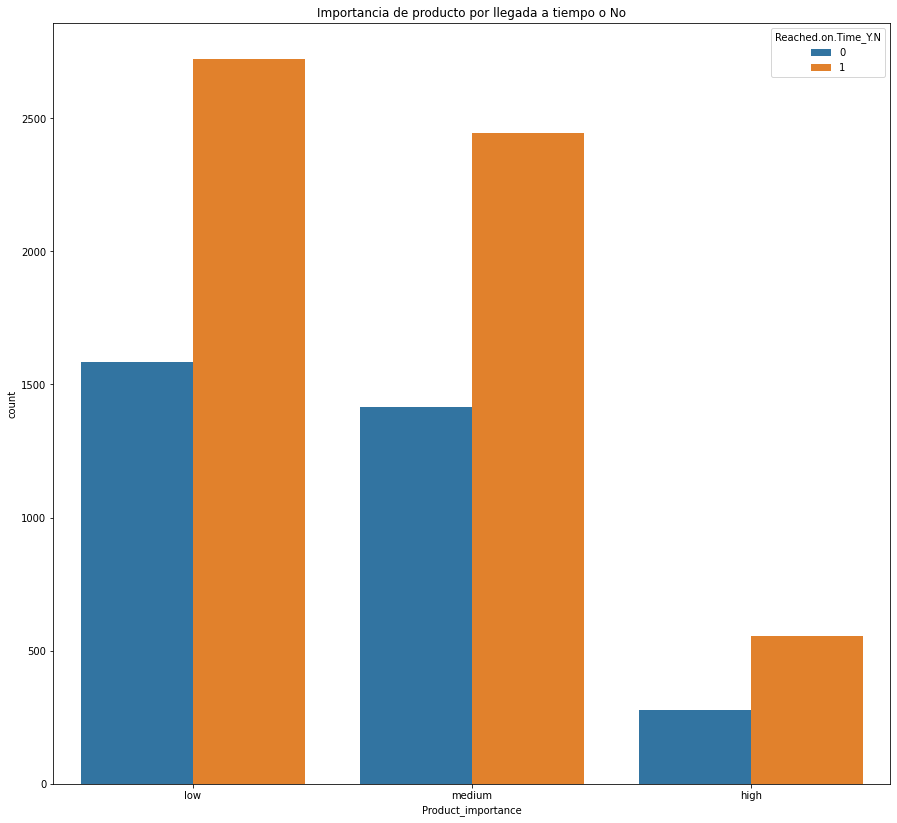

In [365]:
sns.countplot(x = "Product_importance", data = data_train4, hue="Reached.on.Time_Y.N")
plt.title("Importancia de producto por llegada a tiempo o No")

En baja importancia del producto hay mas entregas retrasadas. Pocos productos de gran importancia entregados. Los clientes están pidiendo más productos de baja importancia.

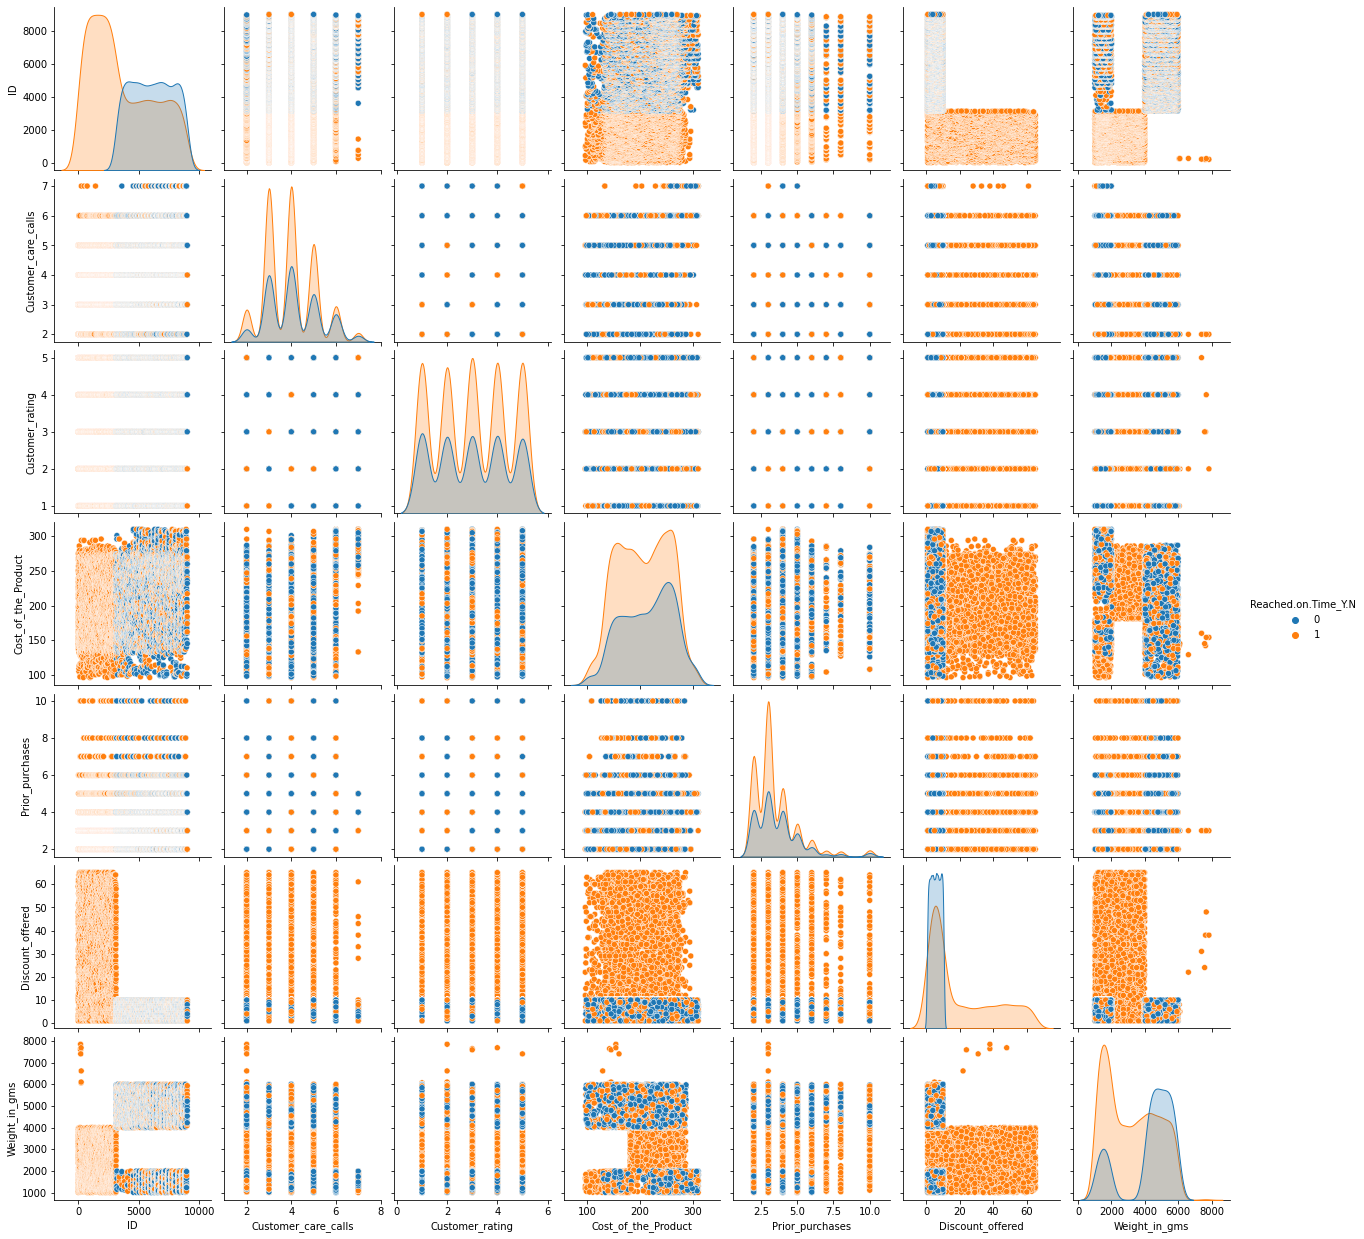

In [366]:
sns.pairplot(data_train4, hue='Reached.on.Time_Y.N')

buscamos columnas correlacionadas para evitar informacion redundante

<AxesSubplot:>

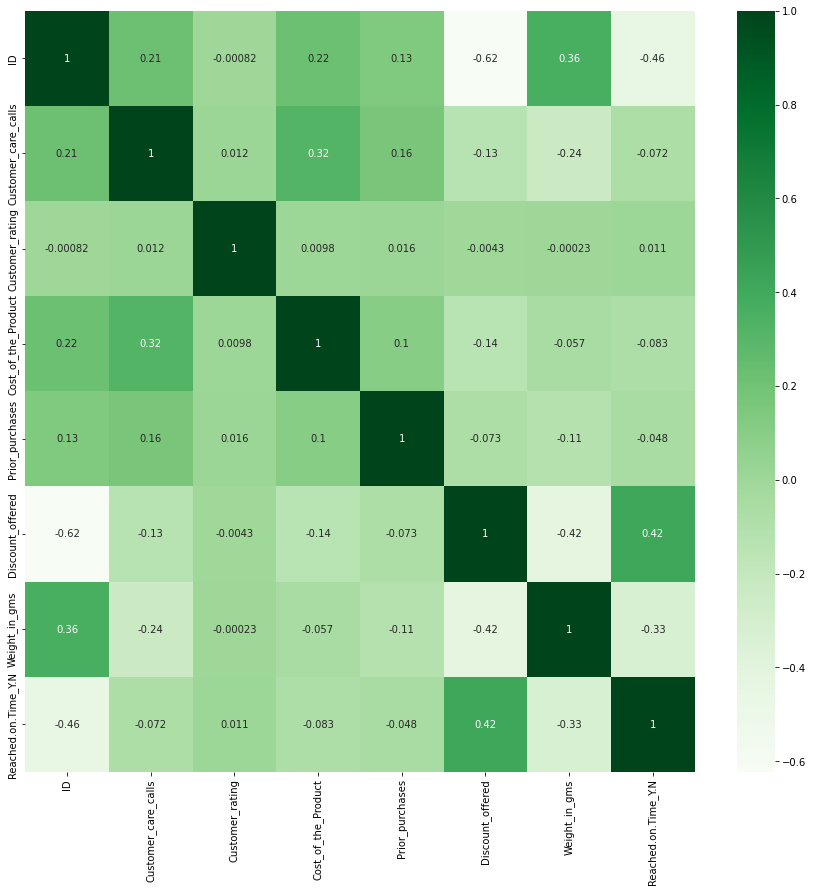

In [367]:
corr = data_train4.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

prueba de chi cuadrado para categorical features

In [368]:
crossTab = pd.crosstab(data_train4['Product_importance'],data_train4['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Product_importance')

crossTab = pd.crosstab(data_train4['Warehouse_block'],data_train4['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Warehouse_block')

crossTab = pd.crosstab(data_train4['Mode_of_Shipment'],data_train4['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'mode of shipment')

p-value  0.175738927009453 Product_importance
p-value  0.9071521437355561 Warehouse_block
p-value  0.2568899601964812 mode of shipment


De la prueba de chi cuadrado, podemos concluir que tres de las características categóricas independientes no están relacionadas con la variable de respuesta porque el valor de p es mayor que 0.05. Por lo tanto, estas columnas se pueden eliminar.

Algunos modelos de machine learning y aprendizaje estadístico requieren que la variable respuesta se distribuya de una forma determinada. Por ejemplo, para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal. Para los modelos lineales generalizados (GLM), la distribución tiene que ser de la familia exponencial. El siguiente codigo nos permite identificar a qué distribución se ajustan mejor los datos con fitter. Por lo que segun los resultados probaremos con reg logistica porque ademas es una variable discreta la que estamos buscando

In [369]:
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(data_train4['Reached.on.Time_Y.N'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  5.43it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,4030.272123,294.839611,-7192.293303,inf,0.612543,0.0
exponpow,4680.694692,364.051050,-5855.034031,inf,0.498582,0.0
chi2,4805.094398,165.042307,-5618.988905,inf,0.418915,0.0
powerlaw,5264.396516,23.448667,-4797.471733,inf,0.635515,0.0
expon,5286.981959,70.688785,-4768.051453,inf,0.428202,0.0
logistic,5308.667147,100.653205,-4731.216470,inf,0.370939,0.0
norm,5310.431751,85.429302,-4728.225693,inf,0.411085,0.0
gamma,5312.746344,86.325087,-4715.199395,inf,0.414065,0.0
cauchy,5367.286615,9397.455727,-4632.392158,inf,0.500000,0.0


miramos la correlacion entre variables, se dropean las columnas genero y compras anteriores ya que no se discrimina el tiempo de entrega segun el sexo 

datta_train2 esta hecho codificacion label encoder a cada columna

In [370]:
data_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [372]:
data_train4 = data_train4.drop(columns=['ID'])

KeyError: "['ID'] not found in axis"

aplico standar scaler a las columasn numericas int

stanadr scaler para variables numericas

In [373]:
data_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 773.5+ KB


In [375]:
scaler = StandardScaler()

# scaler.fit(data_test[['GrLivArea']])

scaler.fit(data_train4[['Customer_care_calls']]) 
scaler.fit(data_train4[['Customer_rating']]) 
scaler.fit(data_train4[['Cost_of_the_Product']]) 
scaler.fit(data_train4[['Prior_purchases']]) 
scaler.fit(data_train4[['Discount_offered']])
scaler.fit(data_train4[['Weight_in_gms']])
#scaler.fit(data_train4[['Reached.on.Time_Y.N']])
	
data_train4['Customer_care_calls'] = scaler.transform(data_train4[['Customer_care_calls']])
data_train4['Customer_rating'] = scaler.transform(data_train4[['Customer_rating']])
data_train4['Cost_of_the_Product'] = scaler.transform(data_train4[['Cost_of_the_Product']])
data_train4['Prior_purchases'] = scaler.transform(data_train4[['Prior_purchases']])
data_train4['Discount_offered'] = scaler.transform(data_train4[['Discount_offered']])
data_train4['Weight_in_gms'] = scaler.transform(data_train4[['Weight_in_gms']])
#data_train4['Reached.on.Time_Y.N'] = scaler.transform(data_train4[['Reached.on.Time_Y.N']]);

c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Customer_care_calls
Feature names seen at fit time, yet now missing:
- Weight_in_gms

  warnings.warn(message, FutureWarning)
c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Customer_rating
Feature names seen at fit time, yet now missing:
- Weight_in_gms

  warnings.warn(message, FutureWarning)
c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will b

In [376]:
scaler = StandardScaler()

# scaler.fit(data_test[['GrLivArea']])
  
scaler.fit(data_test[['Customer_care_calls']]) 
scaler.fit(data_test[['Customer_rating']]) 
scaler.fit(data_test[['Cost_of_the_Product']]) 
scaler.fit(data_test[['Prior_purchases']]) 
scaler.fit(data_test[['Discount_offered']])
scaler.fit(data_test[['Weight_in_gms']])
	
data_test['Customer_care_calls'] = scaler.transform(data_test[['Customer_care_calls']])
data_test['Customer_rating'] = scaler.transform(data_test[['Customer_rating']])
data_test['Cost_of_the_Product'] = scaler.transform(data_test[['Cost_of_the_Product']])
data_test['Prior_purchases'] = scaler.transform(data_test[['Prior_purchases']])
data_test['Discount_offered'] = scaler.transform(data_test[['Discount_offered']])
data_test['Weight_in_gms'] = scaler.transform(data_test[['Weight_in_gms']])
;

c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Customer_care_calls
Feature names seen at fit time, yet now missing:
- Weight_in_gms

  warnings.warn(message, FutureWarning)
c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Customer_rating
Feature names seen at fit time, yet now missing:
- Weight_in_gms

  warnings.warn(message, FutureWarning)
c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will b

''

In [379]:
data_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      8999 non-null   int32  
 1   Mode_of_Shipment     8999 non-null   int32  
 2   Customer_care_calls  8999 non-null   float64
 3   Customer_rating      8999 non-null   float64
 4   Cost_of_the_Product  8999 non-null   float64
 5   Prior_purchases      8999 non-null   float64
 6   Product_importance   8999 non-null   int32  
 7   Gender               8999 non-null   int32  
 8   Discount_offered     8999 non-null   float64
 9   Weight_in_gms        8999 non-null   float64
 10  Reached.on.Time_Y.N  8999 non-null   int64  
dtypes: float64(6), int32(4), int64(1)
memory usage: 632.9 KB


In [378]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
data_train4['Warehouse_block'] = label_encoder.fit_transform(data_train4['Warehouse_block'])
data_train4['Mode_of_Shipment'] = label_encoder.fit_transform(data_train4['Mode_of_Shipment'])
data_train4['Product_importance'] = label_encoder.fit_transform(data_train4['Product_importance'])
data_train4['Gender'] = label_encoder.fit_transform(data_train4['Gender'])

#data_train2['Gender'] = label_encoder.fit_transform(data_train2['Gender'])

Exclusión de variables con varianza próxima a cero
No se deben incluir en el modelo predictores que contengan un único valor (cero-varianza) ya que no aportan información. Tampoco es conveniente incluir predictores que tengan una varianza próxima a cero, es decir, predictores que toman solo unos pocos valores. Tiene que realizarse antes de estandarizar los datos, ya que después, todos los predictores tienen varianza 1.

In [381]:
cant_col=data_train4.shape[1]
cant_col
for i in range(cant_col):
    varianza=data_train4.iloc[:,i].var()
    print(data_train4.columns.values[i],"varianza: ",varianza)

Warehouse_block varianza:  2.222407414263831
Mode_of_Shipment varianza:  0.5712744353976156
Customer_care_calls varianza:  4.975477921247679e-07
Customer_rating varianza:  7.659669897372529e-07
Cost_of_the_Product varianza:  0.0008944109223911448
Prior_purchases varianza:  9.003202218556023e-07
Product_importance varianza:  0.40832972945723317
Gender varianza:  0.250007527200239
Discount_offered varianza:  0.00011612830508190386
Weight_in_gms varianza:  1.0001111358079575
Reached.on.Time_Y.N varianza:  0.23166141228158987


C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_24660\134120269.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)


<AxesSubplot:>

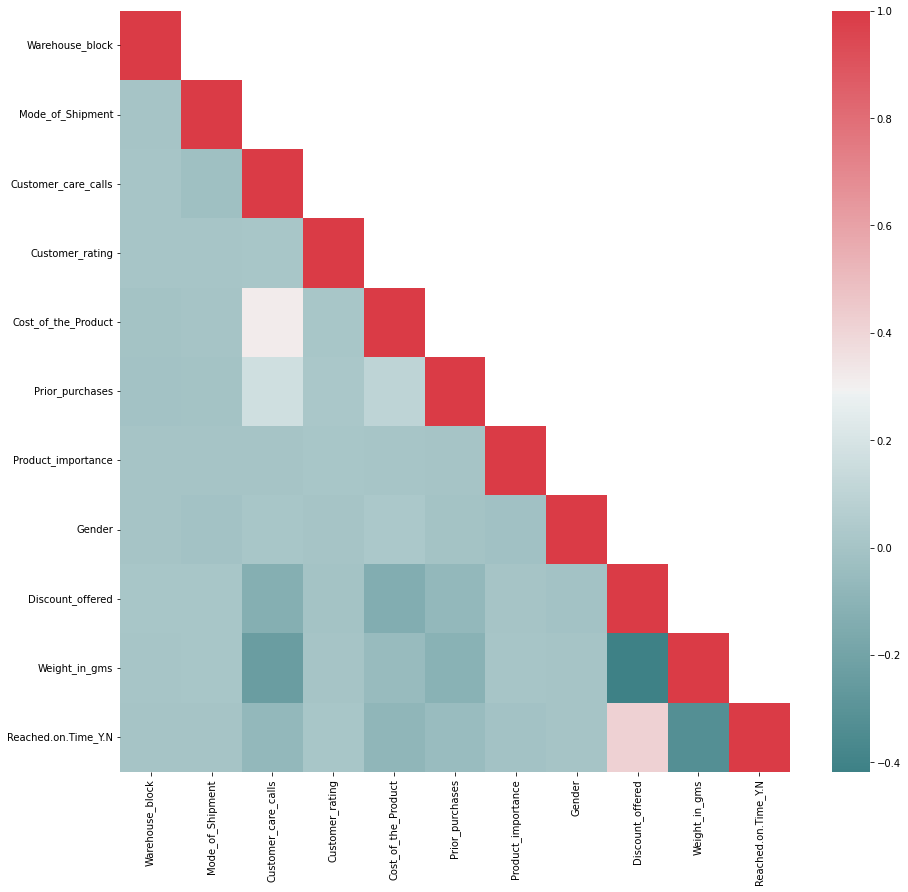

In [382]:
df_columns=data_train4.columns
X_corr= (data_train4[df_columns])
#X.corr()
# Sacamos el id
dt = X_corr
corr = dt.corr() #returns a dataframe, so it can be reused
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(corr, cmap=sns.diverging_palette(200, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

con select k beast seleccionamos el features mas ponderantes confirmando la importancia de las variables numericas para el resultado buscado

In [383]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=4)
X = data_train4[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']] 
y = data_train4[['Reached.on.Time_Y.N']]
selector.fit(X,y)

c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001A8B9FE4280>)

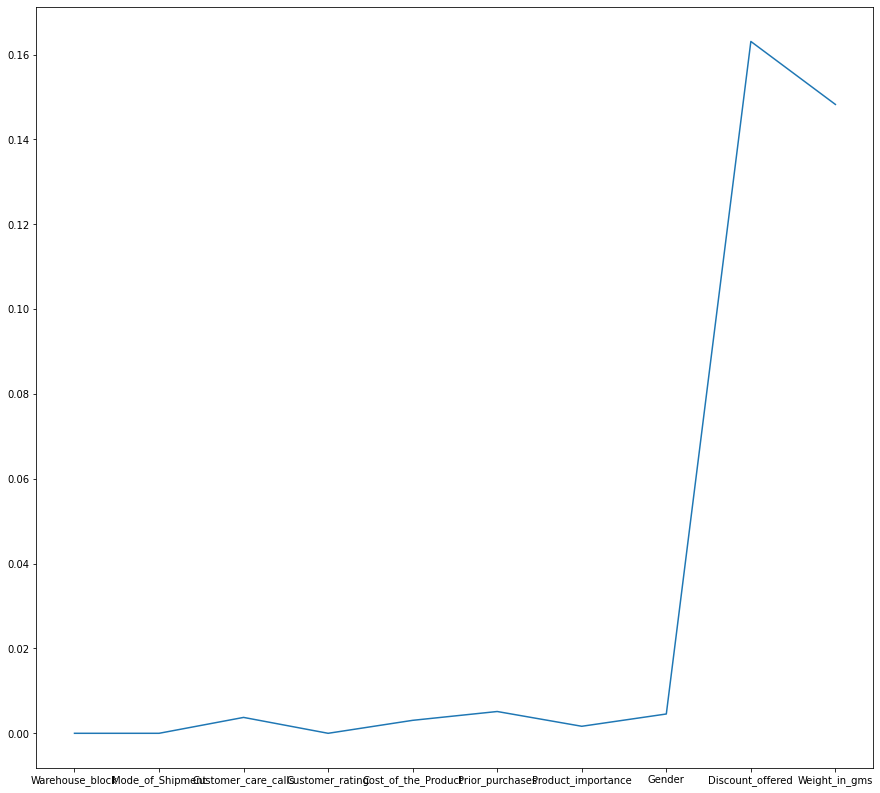

In [384]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [15,14]
plt.plot(scores)
plt.xticks(np.arange(10),list(X.columns));

scores de las columans para el modelo

In [385]:
scores

array([0.        , 0.        , 0.00374512, 0.        , 0.00305781,
       0.00513711, 0.00165547, 0.00455283, 0.16309437, 0.14824492])

segun nuestro selectkbeast la variables mas importantes son discount_offered y weight_grms

In [386]:
data_train4['Reached.on.Time_Y.N'].value_counts()

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

In [387]:
data_train3 = data_train4# es nuestro df scalado y encodeado

In [388]:
data_train3.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,-2.217410,-2.218649,-2.110267,-2.218030,1,0,-2.192637,-1.456259,1
1,4,0,-2.217410,-2.216791,-2.086113,-2.218649,1,1,-2.183347,-0.307411,1
2,0,0,-2.218649,-2.218649,-2.106551,-2.217410,1,1,-2.190160,-0.130284,1
3,1,0,-2.218030,-2.218030,-2.110886,-2.217410,2,1,-2.213694,-1.490942,1
4,2,0,-2.218649,-2.218649,-2.105932,-2.218030,2,0,-2.191399,-0.681484,1


In [58]:
# data_train3 = pd.get_dummies(data_train3,columns=['Product_importance'], drop_first=True)
# data_train3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_1,Product_importance_2
0,1,3,0,4,2,177,3,0,44,1233,1,1,0
1,2,4,0,4,5,216,2,1,59,3088,1,1,0
2,3,0,0,2,2,183,4,1,48,3374,1,1,0
3,4,1,0,3,3,176,4,1,10,1177,1,0,1
4,5,2,0,2,2,184,3,0,46,2484,1,0,1


In [390]:
dtr = data_train3.drop(columns=['Warehouse_block','Mode_of_Shipment','Gender','Product_importance'])

In [391]:
dtr.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,-2.217410,-2.218649,-2.110267,-2.218030,-2.192637,-1.456259,1
1,-2.217410,-2.216791,-2.086113,-2.218649,-2.183347,-0.307411,1
2,-2.218649,-2.218649,-2.106551,-2.217410,-2.190160,-0.130284,1
3,-2.218030,-2.218030,-2.110886,-2.217410,-2.213694,-1.490942,1
4,-2.218649,-2.218649,-2.105932,-2.218030,-2.191399,-0.681484,1


armamos uestro modelo

In [394]:
data_train3.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,-2.217410,-2.218649,-2.110267,-2.218030,-2.192637,-1.456259
1,-2.217410,-2.216791,-2.086113,-2.218649,-2.183347,-0.307411
2,-2.218649,-2.218649,-2.106551,-2.217410,-2.190160,-0.130284
3,-2.218030,-2.218030,-2.110886,-2.217410,-2.213694,-1.490942
4,-2.218649,-2.218649,-2.105932,-2.218030,-2.191399,-0.681484


In [393]:
data_train3 = data_train3.drop(columns=(['Warehouse_block','Mode_of_Shipment','Gender','Product_importance','Reached.on.Time_Y.N']))

In [205]:
# data_train3 = data_train3.drop(columns=(['Reached.on.Time_Y.N']))

In [395]:
X = data_train3.values
y =dtr['Reached.on.Time_Y.N'].values

In [398]:
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [399]:
len(X)

8999

In [400]:
len(y)

8999

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [402]:
X_test

array([[-2.21802952, -2.21802952, -2.11584086, -2.21864885, -2.21431357,
         0.63396325],
       [-2.2174102 , -2.21679087, -2.07001079, -2.21864885, -2.21926817,
         1.29911857],
       [-2.21679087, -2.21679087, -2.13008534, -2.21864885, -2.19015989,
        -1.08404499],
       ...,
       [-2.21617155, -2.21802952, -2.05948226, -2.21679087, -2.21926817,
        -1.43272511],
       [-2.2174102 , -2.21679087, -2.13380129, -2.21802952, -2.17963136,
        -1.42900915],
       [-2.21864885, -2.2174102 , -2.12884669, -2.21864885, -2.21802952,
         0.96096698]])

In [403]:
len(y_test)

1800

In [404]:
from sklearn.linear_model import LogisticRegression

# escalar= StandardScaler()
# X_train= escalar.fit_transform(X_train)
# X_test = escalar.fit_transform(X_test)

algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [405]:
y_pred = algoritmo.predict(X_test)

In [406]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

trababajmos sobre los datos de test

In [409]:
data_test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,F,Ship,-2.256368,-2.258711,-2.148599,-2.258125,medium,M,-2.253439,0.814459
1,D,Ship,-2.256368,-2.257539,-2.171441,-2.258125,high,F,-2.254025,0.344728
2,F,Ship,-2.257539,-2.257539,-2.142156,-2.257539,low,M,-2.257539,1.102038
3,A,Ship,-2.256368,-2.258711,-2.181398,-2.258125,medium,M,-2.258711,0.460111
4,B,Ship,-2.256954,-2.258125,-2.107014,-2.257539,low,M,-2.256954,0.964399


In [408]:
data_test = data_test.drop(columns=['ID'])

In [410]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      2000 non-null   object 
 1   Mode_of_Shipment     2000 non-null   object 
 2   Customer_care_calls  2000 non-null   float64
 3   Customer_rating      2000 non-null   float64
 4   Cost_of_the_Product  2000 non-null   float64
 5   Prior_purchases      2000 non-null   float64
 6   Product_importance   2000 non-null   object 
 7   Gender               2000 non-null   object 
 8   Discount_offered     2000 non-null   float64
 9   Weight_in_gms        2000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 156.4+ KB


In [184]:
# scaler = StandardScaler()

# # scaler.fit(data_test[['GrLivArea']])
  
# scaler.fit(data_test[['Customer_care_calls']]) 
# scaler.fit(data_test[['Customer_rating']]) 
# scaler.fit(data_test[['Cost_of_the_Product']]) 
# scaler.fit(data_test[['Prior_purchases']]) 
# scaler.fit(data_test[['Discount_offered']])
# scaler.fit(data_test[['Weight_in_gms']])
	
# data_test['Customer_care_calls'] = scaler.transform(data_test[['Customer_care_calls']])
# data_test['Customer_rating'] = scaler.transform(data_test[['Customer_rating']])
# data_test['Cost_of_the_Product'] = scaler.transform(data_test[['Cost_of_the_Product']])
# data_test['Prior_purchases'] = scaler.transform(data_test[['Prior_purchases']])
# data_test['Discount_offered'] = scaler.transform(data_test[['Discount_offered']])
# data_test['Weight_in_gms'] = scaler.transform(data_test[['Weight_in_gms']]);

c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Customer_care_calls
Feature names seen at fit time, yet now missing:
- Weight_in_gms

  warnings.warn(message, FutureWarning)
c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Customer_rating
Feature names seen at fit time, yet now missing:
- Weight_in_gms

  warnings.warn(message, FutureWarning)
c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will b

In [415]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data_test['Warehouse_block'] = label_encoder.fit_transform(data_test['Warehouse_block'])
data_test['Mode_of_Shipment'] = label_encoder.fit_transform(data_test['Mode_of_Shipment'])
data_test['Product_importance'] = label_encoder.fit_transform(data_test['Product_importance'])
data_test['Gender'] = label_encoder.fit_transform(data_test['Gender'])

In [418]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  2000 non-null   float64
 1   Customer_rating      2000 non-null   float64
 2   Cost_of_the_Product  2000 non-null   float64
 3   Prior_purchases      2000 non-null   float64
 4   Discount_offered     2000 non-null   float64
 5   Weight_in_gms        2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


In [417]:
data_test = data_test.drop(columns=(['Warehouse_block','Mode_of_Shipment','Gender','Product_importance']))

In [422]:
data_test = data_test.select_dtypes('number')
#y_pred = algoritmo.predict(X_test)
result = pd.DataFrame(algoritmo.predict(data_test), columns = ['pred'])

print(f'Accuracy en test: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Recall score en test: {round(recall_score(y_test, y_pred),4)}')


Accuracy en test: 0.671
Recall score en test: 0.7929


c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [420]:
result.to_csv("leo1489.csv", index=False)

In [421]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  2000 non-null   float64
 1   Customer_rating      2000 non-null   float64
 2   Cost_of_the_Product  2000 non-null   float64
 3   Prior_purchases      2000 non-null   float64
 4   Discount_offered     2000 non-null   float64
 5   Weight_in_gms        2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


In [332]:
y_pred2= algoritmo.predict(X2)
y_pred2

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [223]:
dataframe =pd.DataFrame(y_pred2) 

In [226]:
col=["pred"]
df3=pd.DataFrame(y_pred2)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df3.columns=col

In [423]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[269 348]
 [245 938]]


In [424]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7293934681181959


In [425]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6705555555555556


In [426]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.7928994082840237


In [ ]:
#X = dataset.iloc[:, :2].values

In [427]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [276]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# #Scaling the data
# # ms = MinMaxScaler()

# escalar = StandardScaler()
# X_train = escalar.fit_transform(X_train)
# X_test = escalar.fit_transform(X_test)

despues de encodear nuestras variables procedemos a standarizar y dividir en ser de train y test

In [428]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier()
#tree = DecisionTreeClassifier(max_depth=3)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tree.fit(X_train, y_train)





DecisionTreeClassifier()

In [429]:
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(y_test,y_pred)

[0 1 1 ... 0 0 1] [0 0 1 ... 0 0 1]


In [430]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [431]:
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(y_test,y_pred)

[0 1 1 ... 0 0 1] [0 0 1 ... 1 0 1]


In [166]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7199, 6)
(1800, 6)
(7199, 1)
(1800, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[[ 7.89175700e-04 -6.87326228e-03 -5.27396347e-04 -8.36310535e-03
   9.08578694e-03 -5.70760728e-05]]
[0.8348383]
6


In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.18347482796657205
Error en datos de test: 0.1880053696382709


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7199, 6)
(1800, 6)
(7199, 1)
(1800, 1)
